In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/Nancy Sorroza Rojas/Desktop/Pool/Proyectos Data Science/Space X practice/data/dataset_part_2.csv'
df = pd.read_csv(path)
df.head(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0


First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

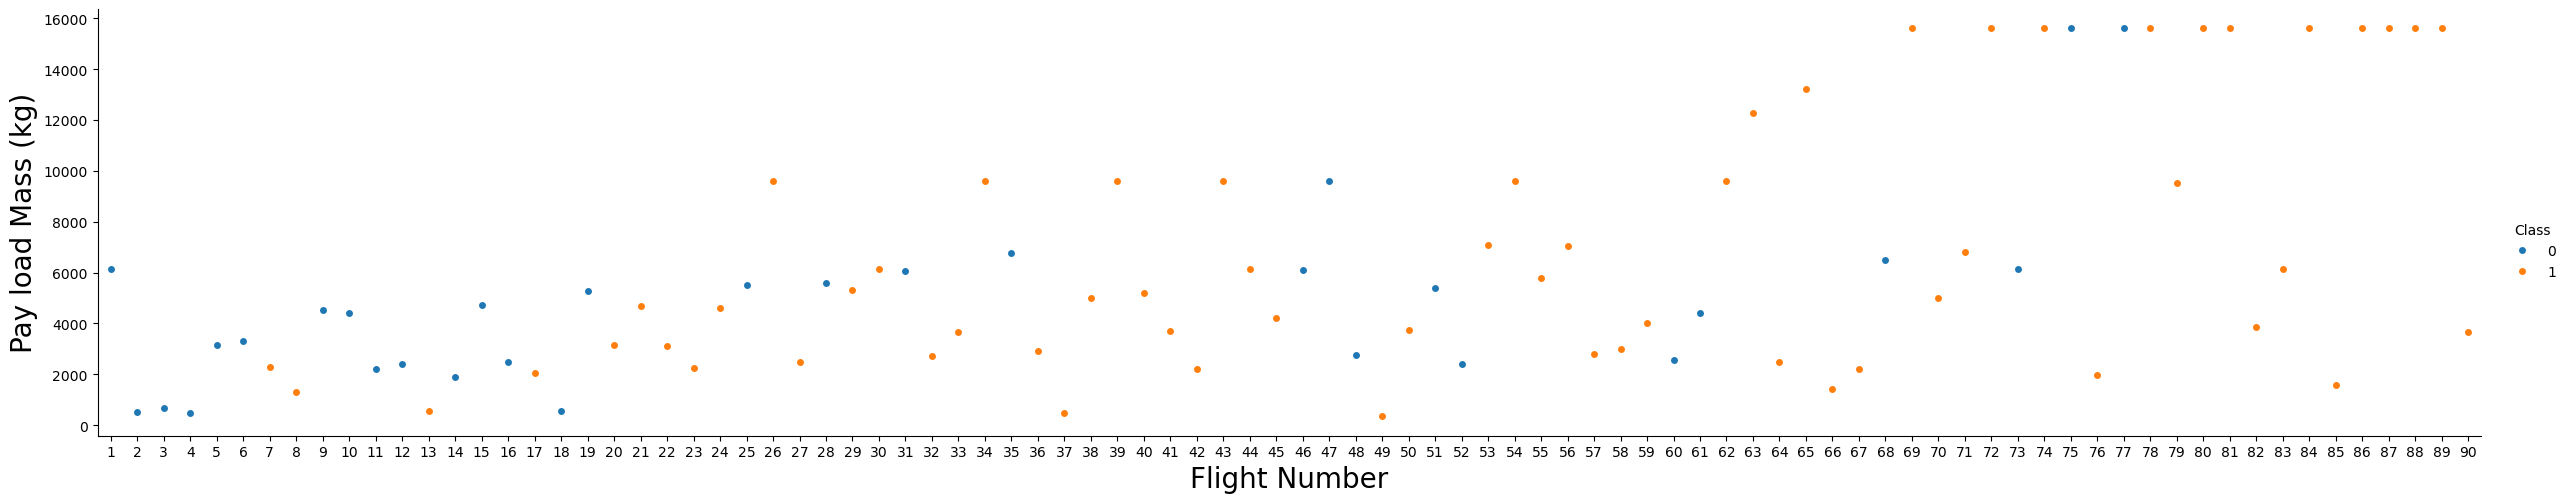

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

# TASK 1: Visualize the relationship between Flight Number and Launch Site
### Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

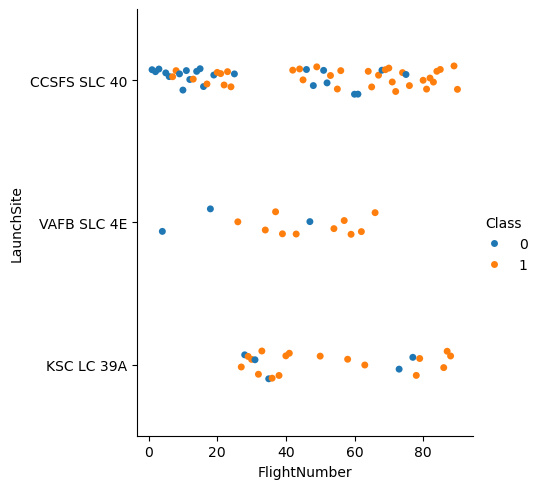

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.
    
    That it is a more concentration in CCSFS SLC 40.
    KSC LC 39A has the second place in FlightNumber concentration.
    VAFB SLC 4E has the lowest concentration in FlightNumber.

# TASK 2: Visualize the relationship between Payload Mass and Launch Site
### We also want to observe if there is any relationship between launch sites and their payload mass.

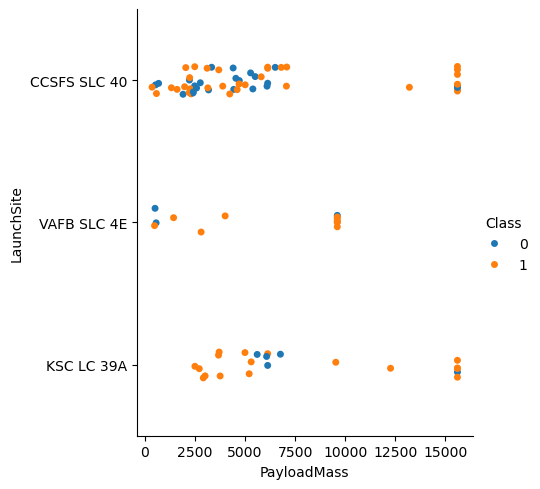

In [5]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df)
plt.show()

Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

# TASK 3: Visualize the relationship between success rate of each orbit type
### Next, we want to visually check if there are any relationship between success rate and orbit type.
### Let's create a bar chart for the sucess rate of each orbit

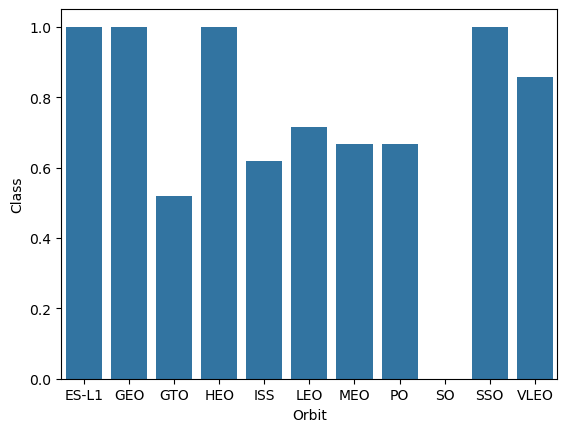

In [6]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit_mean = df.groupby('Orbit')['Class'].mean().reset_index()
sns.barplot(
    x='Orbit',
    y='Class',
    data=orbit_mean)
plt.show()

Analyze the plotted bar chart to identify which orbits have the highest success rates.

    The Orbit 'ES-L1', 'GEO', 'HEO' and 'SSO' has the higest values in the chart, almost 1.
    It's lioke this orbit has a mean of 1 all the time.

# TASK 4: Visualize the relationship between FlightNumber and Orbit type
### For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

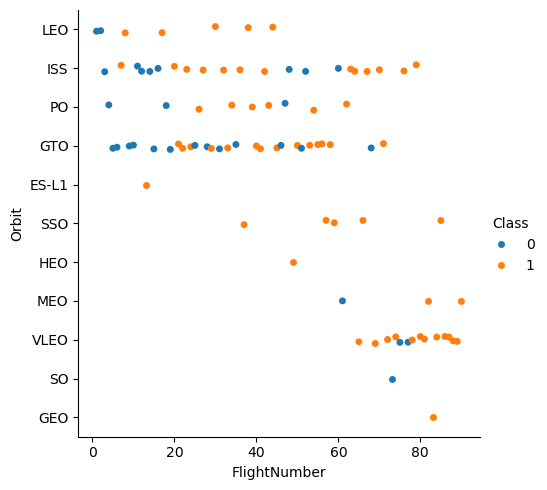

In [7]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='FlightNumber',y='Orbit',hue='Class',data=df)
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.

# TASK 5: Visualize the relationship between Payload Mass and Orbit type
### Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type

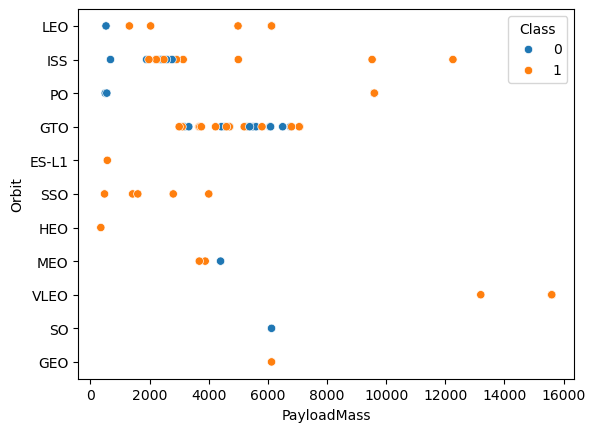

In [8]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x='PayloadMass',y='Orbit',hue='Class',data=df)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.

# TASK 6: Visualize the launch success yearly trend
### You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

### The function will help you get the year from the date:

In [9]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


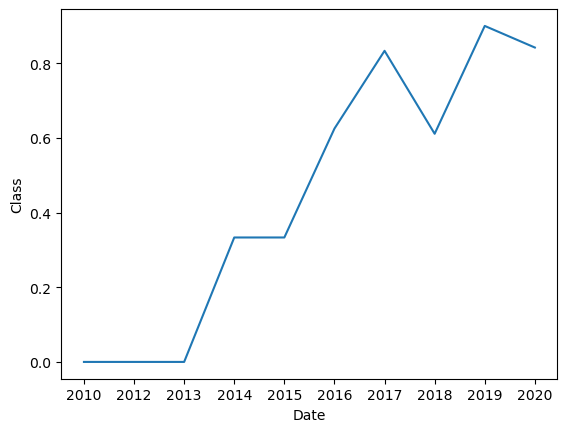

In [10]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
year_success_rate = df.groupby('Date')['Class'].mean().reset_index()
sns.lineplot(x='Date',y='Class', data=year_success_rate)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020

# Features Engineering
### By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [11]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


# TASK 7: Create dummy variables to categorical columns
### Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [12]:
# HINT: Use get_dummies() function on the categorical columns
# Get 'Category' columns
cat_cols = [col for col in features.columns if features[col].dtype in ['O', 'Category']]
# Use get_dummies() to encode the Categry columns
encode_cat_cols = pd.get_dummies(features[cat_cols], drop_first=False)#.astype(int)
# Concat the two dataframes, droping the Category columns to avoid duplicated information
features_one_hot = pd.concat([features.drop(columns=cat_cols), encode_cat_cols],axis=1)
# View the results
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


# TASK 8: Cast all numeric columns to float64
### Now that our features_one_hot dataframe only contains numbers, cast the entire dataframe to variable type float64

In [13]:
features_one_hot = features_one_hot.astype('int64')

# Export Data

In [14]:
features_one_hot.to_csv('C:/Users/Nancy Sorroza Rojas/Desktop/Pool/Proyectos Data Science/Space X practice/data/dataset_part_3.csv', index=False)